In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import numpy as np

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
homes1 = pd.DataFrame.from_csv('data/Zip_Zhvi_Summary_AllHomes.csv', index_col=None)
homes1.head()

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
0,2017-05-31,61639,10025,NY,New York,New York,New York,0,1178700,0.030602,0.051097,0.108739,0.088801,0.049093,2017-05,2017-Q2,1178700,0.000000,2017-05
1,2017-05-31,84654,60657,IL,Chicago,Cook,Chicago,1,327700,0.005523,0.017070,0.031152,0.045528,0.002162,2017-05,2017-Q2,327700,0.000000,2017-05
2,2017-05-31,84616,60614,IL,Chicago,Cook,Chicago,2,401900,-0.008633,-0.040124,-0.005198,0.045068,0.002856,2017-02,2017-Q1,418700,-0.040124,2016-09
3,2017-05-31,93144,79936,TX,El Paso,El Paso,El Paso,3,114800,0.000872,-0.001739,0.025000,0.002280,-0.011594,2007-12,2007-Q4,131100,-0.124333,2006-09
4,2017-05-31,84640,60640,IL,Chicago,Cook,Chicago,4,205700,-0.004356,0.002437,0.050562,0.048406,-0.014355,2007-02,2007-Q1,237800,-0.134987,2003-06


In [6]:
homes2 = pd.DataFrame.from_csv('data/Zip_Zhvi_AllHomes.csv', index_col=None)
homes2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1128500,1133300,1132900,1147300,1149800.0,1132700,1121400,1123000,1143700,1178700
1,84654,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318600,318200,318100,318700,320200.0,321000,322200,323800,325900,327700
2,84616,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,400700,401900,406000,414000,417800.0,417700,418700,414100,405400,401900
3,93144,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,113700,113800,113800,114100,114500.0,114900,115000,114700,114700,114800
4,84640,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,200000,198800,199200,200100,201500.0,203200,205200,206700,206600,205700


In [89]:
len(homes2)

13105

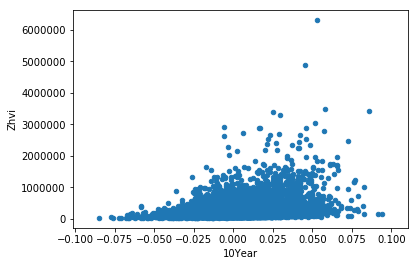

In [7]:
# Scatter plot of 10 year change vs ZHVI value
h = homes1
h.plot.scatter('10Year', 'Zhvi', s=None, c=None)

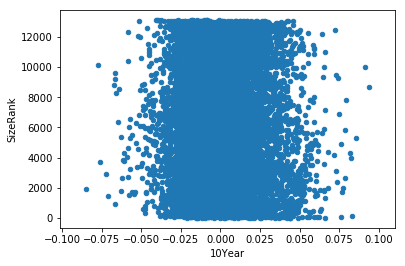

In [8]:
# Scatter plot of the total growth over the last 10 years vs size of the market
h = homes1
h.plot.scatter('10Year', 'SizeRank', s=None, c=None)

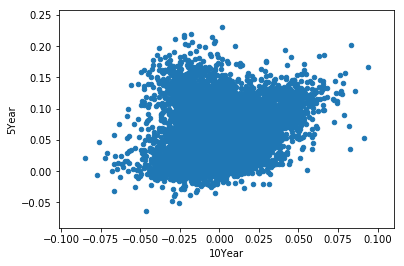

In [82]:
# Scatter plot of the total growth over the last 10 years vs last 5 years
h = homes1
h.plot.scatter('10Year', '5Year', s=None, c=None)

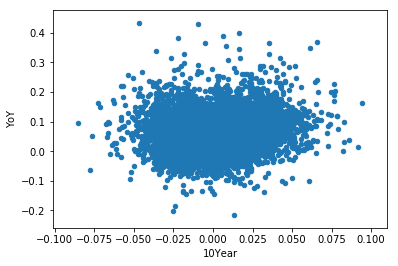

In [83]:
# Scatter plot of the total growth over the last 10 years vs YoY
h = homes1
h.plot.scatter('10Year', 'YoY', s=None, c=None)

In [9]:
# TO DO - determining a best fit line for the scatterplots

In [10]:
# Transposing data

h = homes2
h = h.T
h.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,13095,13096,13097,13098,13099,13100,13101,13102,13103,13104
2016-08,1128500,318600,400700,113700,200000,161200,1102600,297400,573700,160000,...,218500,473200,168900,320500,207300,609000,504900,172100,790600,176300
2016-09,1133300,318200,401900,113800,198800,160500,1105300,299000,584600,160700,...,219700,480800,169800,319300,209800,613500,498200,172700,791700,177000
2016-10,1132900,318100,406000,113800,199200,160600,1109200,301200,595600,162000,...,220300,483000,170300,317500,211700,625300,494400,174200,790100,178300
2016-11,1147300,318700,414000,114100,200100,160600,1117800,303400,605800,162700,...,220600,489200,171100,317600,212300,638500,493000,176200,785900,179700
2016-12,1.1498e+06,320200,417800,114500,201500,159100,1.1256e+06,304700,612600,161500,...,221700,495000,171400,316100,213100,648400,498900,176900,784500,180700
2017-01,1132700,321000,417700,114900,203200,156900,1127700,305500,613200,159100,...,223100,487200,171300,310800,213500,655100,509400,176100,782800,181900
2017-02,1121400,322200,418700,115000,205200,154600,1128600,307300,617000,156300,...,223700,481300,172000,305700,213900,650400,522500,174400,774000,183300
2017-03,1123000,323800,414100,114700,206700,153400,1132000,309700,628700,155100,...,223500,490100,173800,304600,215200,633700,534600,172000,765600,184300
2017-04,1143700,325900,405400,114700,206600,154100,1138300,312000,643100,156400,...,225000,496800,174900,305500,216800,620200,544400,170000,768600,184400
2017-05,1178700,327700,401900,114800,205700,156200,1144000,313700,653400,158800,...,226700,494900,175600,306900,217600,612900,548500,168900,773500,184500


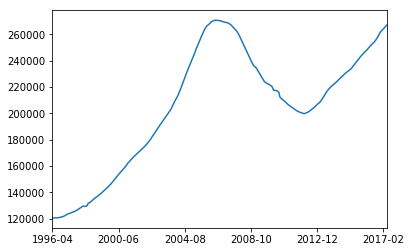

In [25]:
# Overall change in the US housing market over the last 20 years

h = homes2.drop(['RegionID', 'RegionName', 'City', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
h = h.mean()
h = h.T
h.plot(kind = 'line')

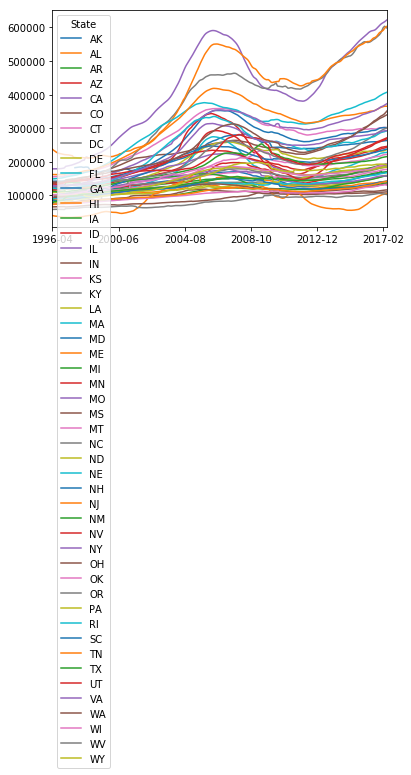

In [75]:
# Grouping by state & transposing

h = homes2.drop(['RegionID', 'RegionName', 'City', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
h = h.groupby(h.State).mean()
h = h.T
h.plot(kind = 'line')

In [76]:
h.round(2).head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,RI,SC,TN,TX,UT,VA,WA,WI,WV,WY
1996-04,NaN,89083.49,75615.96,116251.71,178856.72,134757.92,154759.83,NaN,109185.71,94803.68,...,121119.67,84354.29,72940.40,77433.73,130976.32,128706.12,139667.38,94525.37,58087.5,NaN
1996-05,NaN,88976.15,76012.77,116469.76,178917.49,135360.89,155358.55,NaN,108996.43,94306.19,...,120993.44,84384.76,73133.33,80911.05,131081.58,128968.71,139591.40,102070.99,58100.0,NaN
1996-06,NaN,89076.15,76318.09,116632.68,178883.70,136067.82,155797.86,NaN,109121.43,94172.08,...,120563.93,84520.00,73389.23,81555.08,131507.89,128990.29,139410.75,102207.41,58437.5,NaN
1996-07,NaN,89136.70,76551.06,116637.07,178886.36,136659.90,155977.78,NaN,109314.29,94067.13,...,120100.00,84573.33,73715.15,81690.37,132232.89,128784.53,139236.20,102280.25,58562.5,NaN
1996-08,NaN,89044.95,76673.40,116745.37,179002.08,137179.70,156039.74,NaN,109392.86,94013.07,...,119608.20,84562.86,74051.52,84086.43,133118.42,128626.98,139274.19,102317.28,58437.5,NaN


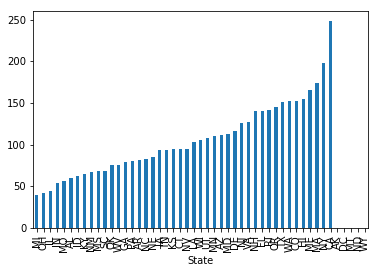

In [40]:
# Percent growth by state for the last 20 years - bar chart

h = homes2
h = h.groupby('State').mean()
h['Percent_Growth'] = (h['2017-05'] / h['1996-04'] - 1) * 100 
h = h.sort_values('Percent_Growth')
h = h.round(2)
h.Percent_Growth.plot(kind = 'bar')


In [42]:
# Percent growth by state for the last 20 years 

h = homes2
h = h.groupby('State').mean()
h['Percent_Growth'] = (h['2017-05'] / h['1996-04'] - 1) * 100 
h = h.sort_values('Percent_Growth')
h = h.round(2)
h.Percent_Growth.head(50)

State
MI     39.16
OH     42.30
IL     44.07
IN     54.20
MO     57.03
AL     59.58
ID     61.96
KY     64.67
NM     67.28
MS     68.05
SC     68.88
OK     75.70
WV     75.79
GA     79.47
PA     79.87
AR     82.20
NC     83.32
NE     84.65
IA     94.02
TN     94.20
KS     94.55
CT     94.70
NV     94.72
LA    103.50
WI    105.55
UT    107.46
MN    110.41
AZ    111.73
MD    112.22
DE    116.76
NJ    125.51
VA    127.48
NH    140.68
FL    140.91
RI    141.77
OR    144.70
TX    151.17
WA    152.12
CO    152.47
HI    154.51
ME    165.41
MA    173.53
NY    197.59
CA    248.40
AK       NaN
DC       NaN
MT       NaN
ND       NaN
WY       NaN
Name: Percent_Growth, dtype: float64

In [ ]:
# plot annual growth by state for 5 slowest growing states for the last 20 years

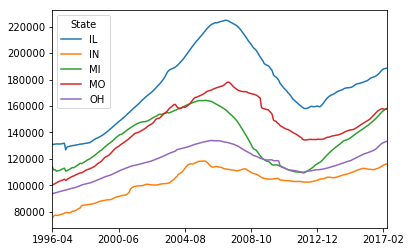

In [66]:
h = homes2.drop(['RegionID', 'RegionName', 'City', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
h = h[(h.State == 'MI') | (h.State == 'MO') | (h.State == 'OH') | (h.State == 'IL') | (h.State == 'IN')]
h = h.groupby(h.State).mean()
h = h.T
h.plot(kind = 'line')

In [ ]:
# plot annual growth by zip for 5 fastest growing zips for the last 20 years

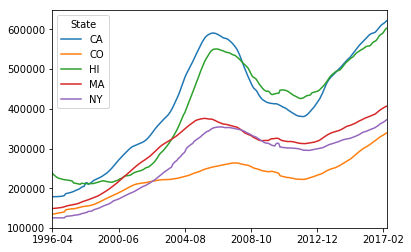

In [73]:
h = homes2.drop(['RegionID', 'RegionName', 'City', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
h = h[(h.State == 'CA') | (h.State == 'NY') | (h.State == 'MA') | (h.State == 'HI') | (h.State == 'CO')]
h = h.groupby(h.State).mean()
h = h.T
h.plot(kind = 'line')

In [ ]:
# plot 5 fastest growing and 5 slowest growing on same plot

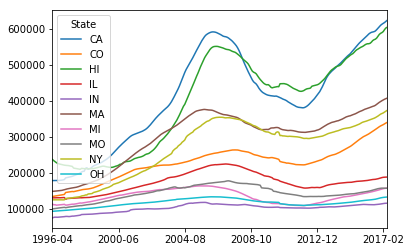

In [72]:
h = homes2.drop(['RegionID', 'RegionName', 'City', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
h = h[(h.State == 'CA') | (h.State == 'NY') | (h.State == 'MA') | (h.State == 'HI') | (h.State == 'CO') | (h.State == 'MI') | (h.State == 'MO') | (h.State == 'OH') | (h.State == 'IL') | (h.State == 'IN')]
h = h.groupby(h.State).mean()
h = h.T
h.plot(kind = 'line')

In [ ]:
# 5 slowest growing zip codes for the last 20 years

In [84]:
h = homes2
h['Percent_Growth'] = (h['2017-05'] / h['1996-04'] - 1) * 100 
h = h.sort_values('Percent_Growth')
h = h.round(2)
h.head(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,Percent_Growth
7835,75364,39577,Wiggins,MS,NaN,Stone,7836,122100.0,121800.0,121600.0,...,114500,110900,106900,102600.0,99900,98500,97100,95200,94100,-22.93
9632,78579,47390,Union City,IN,NaN,Randolph,9633,61700.0,62300.0,61500.0,...,55600,56300,56100,55100.0,53500,52000,50900,49900,49300,-20.10
4008,77037,44137,Maple Heights,OH,Cleveland,Cuyahoga,4009,68500.0,69500.0,69900.0,...,53400,54000,54100,54100.0,54700,55100,55200,55200,55400,-19.12
8461,77150,44405,Campbell,OH,Youngstown,Mahoning,8462,53000.0,51900.0,50800.0,...,36300,36900,37500,38100.0,38800,39900,41200,42400,43100,-18.68
9883,75207,39203,Jackson,MS,Jackson,Hinds,9884,40200.0,40700.0,41100.0,...,38400,36300,35300,35600.0,36000,35500,34500,33900,33400,-16.92


In [ ]:
# 5 fastest growing zips for the last 20 years

In [86]:
h = homes2
h['Percent_Growth'] = (h['2017-05'] / h['1996-04'] - 1) * 100 
h = h.sort_values('Percent_Growth')
h = h[np.isfinite(h['Percent_Growth'])]
h = h.round(2)
h.tail(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,Percent_Growth
1818,58642,2128,Boston,MA,Boston,Suffolk,1819,66400.0,65900.0,65600.0,...,396800,401300,406500,410800.0,413600,417500,423400,429600,435000,555.12
5850,60647,7310,Jersey City,NJ,New York,Hudson,5851,108700.0,107300.0,106900.0,...,649400,656500,670700,688000.0,704700,718700,726400,724700,719600,562.01
1628,96127,90291,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1629,246200.0,243300.0,241000.0,...,1619500,1622400,1629800,1633000.0,1628800,1627200,1627900,1631000,1634400,563.85
6911,58634,2120,Boston,MA,Boston,Suffolk,6912,84900.0,85400.0,86400.0,...,514600,514200,521600,541900.0,568800,586400,587400,586000,588600,593.29
296,60639,7302,Jersey City,NJ,New York,Hudson,297,87700.0,89500.0,90100.0,...,648500,664600,684700,700400.0,707400,713000,721300,728100,731700,734.32


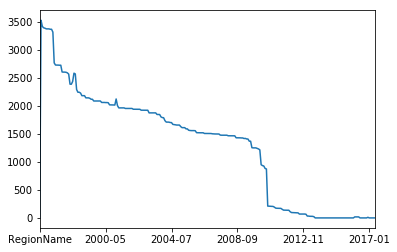

In [96]:
h = homes2.drop(['RegionID', 'State', 'City', 'Metro', 'CountyName', 'SizeRank', 'Percent_Growth'], axis = 1)
count_nan = len(h) - h.count()
count_nan.plot()

In [100]:
h = homes2
count_nan = len(h) - h.count()
count_nan.tail(80)

2010-11            206
2010-12            205
2011-01            193
2011-02            175
2011-03            172
2011-04            171
2011-05            171
2011-06            170
2011-07            153
2011-08            139
2011-09            138
2011-10            137
2011-11            137
2011-12            137
2012-01            111
2012-02             96
2012-03             95
2012-04             94
2012-05             94
2012-06             93
2012-07             90
2012-08             69
2012-09             69
2012-10             69
2012-11             69
2012-12             69
2013-01             66
2013-02             33
2013-03             33
2013-04             29
                  ... 
2015-01              0
2015-02              0
2015-03              0
2015-04              0
2015-05              0
2015-06              0
2015-07              0
2015-08              0
2015-09              0
2015-10              0
2015-11              0
2015-12              0
2016-01    

In [ ]:
# Using melt to get all dates in a single column
h2 = homes2
h2 = pd.melt(h2, id_vars=["State", "RegionID", "RegionName", "City", "Metro", "CountyName", "SizeRank"], 
                  var_name="Date", value_name="Value")
h2.head()